In [88]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [89]:
df=pd.read_csv('April.csv')
orders=pd.read_csv('april orders 2023.csv')

In [90]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [91]:
orders

,order_id,amount,amount_paid,amount_due,currency,receipt,offer_id,status,attempts,notes,created_at
0,order_LYNixREtZ5yK9S,1958.0,1958.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Kanchan "",""email"":""Samtani.kanchan@bcg.com"",""towers"":""Lodha Bellissimo"",""apartment_no"":""B501"",""phone"":""9820354560""}",01/04/2023 09:08:51
1,order_LYX61KR1NfQCKT,1100.0,0.0,1100.0,INR,NaN,NaN,created,0,"{""name"":""Sonavi Desai"",""email"":""sonavid@gmail.com"",""towers"":""Vivarea B"",""apartment_no"":""2903"",""phone"":""9820097357""}",01/04/2023 18:18:56
2,order_LYX7VqyBqc61HI,750.0,0.0,750.0,INR,NaN,NaN,created,0,"{""name"":""Sonavi Desai"",""email"":""sonavid@gmail.com"",""towers"":""Vivarea B"",""apartment_no"":""2903"",""phone"":""9820097357""}",01/04/2023 18:20:21
3,order_LYXuMMuY5pVnm9,750.0,750.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Sonavi Desai"",""email"":""sonavid@gmail.com"",""towers"":""Vivarea B"",""apartment_no"":""2903"",""phone"":""9820097357""}",01/04/2023 19:06:35
4,order_LYnHqGt69fvok7,310.0,0.0,310.0,INR,NaN,NaN,created,0,"{""name"":""Meher Mirza"",""email"":""mehermirza123@gmail.com"",""towers"":""Parsi Colony"",""apartment_no"":""8"",""phone"":""+919821412316""}",02/04/2023 10:09:13
...,...,...,...,...,...,...,...,...,...,...,...
175,order_LjsyWG1ZMGkP9H,762.0,762.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""kanchan"",""email"":""samtani.kanchan@bcg.com"",""towers"":""Lodha Bellisimo"",""apartment_no"":""B501"",""phone"":""9820354560""}",30/04/2023 10:52:06
176,order_Ljszhsj5sMA4lc,765.0,765.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""kanchan"",""email"":""samtani.kanchan@bcg.com"",""towers"":""Lodha Bellisimo"",""apartment_no"":""B501"",""phone"":""9820354560""}",30/04/2023 10:53:14
177,order_LjxxfF34hh6F0F,1410.0,1410.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Anubha"",""email"":""sawhney.anubha@gmail.com"",""towers"":""Vivarea C"",""apartment_no"":""1603"",""phone"":""9811190907""}",30/04/2023 15:44:46
178,order_Ljy3uDQN9Fg3Lk,1765.0,0.0,1765.0,INR,NaN,NaN,attempted,1,"{""name"":""Michelle Baptist"",""email"":""michbaptist@gmail.com"",""towers"":""Vivarea D"",""apartment_no"":""803"",""phone"":""09820605121""}",30/04/2023 15:50:41


In [92]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]


In [93]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [94]:
orders

,order_id,name,email
0,order_LYNixREtZ5yK9S,Kanchan,Samtani.kanchan@bcg.com
1,order_LYX61KR1NfQCKT,Sonavi Desai,sonavid@gmail.com
2,order_LYX7VqyBqc61HI,Sonavi Desai,sonavid@gmail.com
3,order_LYXuMMuY5pVnm9,Sonavi Desai,sonavid@gmail.com
4,order_LYnHqGt69fvok7,Meher Mirza,mehermirza123@gmail.com
...,...,...,...
175,order_LjsyWG1ZMGkP9H,kanchan,samtani.kanchan@bcg.com
176,order_Ljszhsj5sMA4lc,kanchan,samtani.kanchan@bcg.com
177,order_LjxxfF34hh6F0F,Anubha,sawhney.anubha@gmail.com
178,order_Ljy3uDQN9Fg3Lk,Michelle Baptist,michbaptist@gmail.com


In [95]:
orders.isnull().sum()

order_id    0
name        8
email       8
dtype: int64

In [96]:
orders[orders['name'].isnull()]

,order_id,name,email
83,order_LcYlLajnNVdp0F,NaN,NaN
84,order_Lcp59MmrP6y2Pp,NaN,NaN
93,order_Le4OUFAZiwcxfH,NaN,NaN
125,order_Lg0aPs9ORASjxI,NaN,NaN
163,order_Lht6iPVCXrPorD,NaN,NaN
164,order_Li1BklMZv30UfC,NaN,NaN
168,order_LimTH7z96wUrdn,NaN,NaN
169,order_Linc1uzFpsfmNg,NaN,NaN


In [97]:
combined_data=pd.merge(df,orders,on='order_id',how="left")

In [98]:
combined_data[combined_data['name'].isnull()]['order_id'].nunique()

19

In [99]:
combined_data[combined_data['name'].isnull()]['item payment amount'].sum()

7815.0

In [100]:
combined_data.isnull().sum()

payment page id           0
payment page title        0
payment date              0
order_id                  0
item name                 0
item amount               0
item quantity             0
item payment amount       0
total payment amount      0
currency                  0
payment status            0
payment id                0
name                    145
email                   145
dtype: int64

In [101]:
#combined_data.dropna(subset=['name'],inplace=True)

In [102]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
763,pl_LjSEzj8c6pW6eg,FORM 1 VEGETABLES MAY 2,01/05/2023 11:43:12,order_LkINV8ISwOwJkU,Green Capsicum 500g,42.0,1,42.0,455.0,INR,captured,pay_LkINbIh2bgHXid,NaN,NaN
764,pl_LjSEzj8c6pW6eg,FORM 1 VEGETABLES MAY 2,01/05/2023 11:43:12,order_LkINV8ISwOwJkU,Tomatoes 1kg,38.0,2,76.0,455.0,INR,captured,pay_LkINbIh2bgHXid,NaN,NaN
765,pl_LjSEzj8c6pW6eg,FORM 1 VEGETABLES MAY 2,01/05/2023 11:43:12,order_LkINV8ISwOwJkU,French Beans 500g,60.0,1,60.0,455.0,INR,captured,pay_LkINbIh2bgHXid,NaN,NaN
766,pl_LjSEzj8c6pW6eg,FORM 1 VEGETABLES MAY 2,01/05/2023 11:43:12,order_LkINV8ISwOwJkU,Cauliflower,48.0,1,48.0,455.0,INR,captured,pay_LkINbIh2bgHXid,NaN,NaN
767,pl_LjSEzj8c6pW6eg,FORM 1 VEGETABLES MAY 2,01/05/2023 11:43:12,order_LkINV8ISwOwJkU,Ladies Finger 250g,28.0,2,56.0,455.0,INR,captured,pay_LkINbIh2bgHXid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:50:27,order_LkPenuF7Wsrdnr,S SUMMERCRISP,110.0,1,110.0,1085.0,INR,failed,pay_LkPev6iEkOzsRv,NaN,NaN
939,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:50:27,order_LkPenuF7Wsrdnr,JAPANESE CUCUMBER 500G,80.0,3,240.0,1085.0,INR,failed,pay_LkPev6iEkOzsRv,NaN,NaN
940,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:53:53,order_LkPiRC3vDpVDlK,S BUTTERHEAD,110.0,1,110.0,235.0,INR,failed,pay_LkPiYFOQzYQ6hd,NaN,NaN
941,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:53:53,order_LkPiRC3vDpVDlK,S SPICY MIX,110.0,1,110.0,235.0,INR,failed,pay_LkPiYFOQzYQ6hd,NaN,NaN


In [103]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [104]:
combined_data_copy=combined_data.copy()

In [105]:
combined_data_copy.tail()

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email
938,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:50:27,order_LkPenuF7Wsrdnr,S SUMMERCRISP,110.0,1,110.0,1085.0,INR,failed,pay_LkPev6iEkOzsRv,NaN,NaN
939,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:50:27,order_LkPenuF7Wsrdnr,JAPANESE CUCUMBER 500G,80.0,3,240.0,1085.0,INR,failed,pay_LkPev6iEkOzsRv,NaN,NaN
940,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:53:53,order_LkPiRC3vDpVDlK,S BUTTERHEAD,110.0,1,110.0,235.0,INR,failed,pay_LkPiYFOQzYQ6hd,NaN,NaN
941,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:53:53,order_LkPiRC3vDpVDlK,S SPICY MIX,110.0,1,110.0,235.0,INR,failed,pay_LkPiYFOQzYQ6hd,NaN,NaN
942,pl_LjSKDbV59mNxu6,"SALADS, EXOTIC VEGETABLES -\n MAY 2",01/05/2023 18:53:53,order_LkPiRC3vDpVDlK,DELIVERY,15.0,1,15.0,235.0,INR,failed,pay_LkPiYFOQzYQ6hd,NaN,NaN


### checking unique values and their count in each columns

In [106]:
combined_data_copy['payment page id'].nunique()

21

In [107]:
combined_data_copy['payment page id'].value_counts()

pl_LjSEzj8c6pW6eg    92
pl_LgPq1hiWfh7uZE    88
pl_LfEYgMvB1RB9JO    85
pl_LblnG6bc3LyLjc    60
pl_LgPr8OEBKUumOk    60
pl_LblkaDJi6n12K4    56
pl_LjSHnZA8im8hat    54
pl_LgJLI9cqFxo6Mj    53
pl_LjSKDbV59mNxu6    50
pl_LehOx127MwLSZV    45
pl_LcV81efb18iNKA    44
pl_LeqHkRWS3huddU    44
pl_La3sRsT9Tonx59    41
pl_LeqLA5vpoiL96E    36
pl_LblgbwaRPcVwgV    35
pl_LfEV2TLh2qUNGK    28
pl_Lh5iy393VWCFAg    23
pl_LeVcV92ibOqDWM    21
pl_LiIUeLszeHSrhZ    12
pl_LdCphbS3cNzfbW     8
pl_LeuV7SMSJOottt     8
Name: payment page id, dtype: int64

In [108]:
combined_data_copy['payment page title'].nunique()

21

In [109]:
combined_data_copy['payment page title'].value_counts()

FORM 1 VEGETABLES MAY 2                     92
FORM 1 VEGETABLES APRIL 25                  88
FRUIT BASKET-- 21st APRIL                   85
FORM 2 VEGETABLES APRIL 12                  60
FORM 2 VEGETABLES APRIL 25                  60
FORM 1 VEGETABLES APRIL 12                  56
FORM 2 VEGETABLES MAY 2                     54
SALADS, EXOTIC VEGETABLES -\n 25th APRIL    53
SALADS, EXOTIC VEGETABLES -\n MAY 2         50
SALADS, EXOTIC VEGETABLES APRIL-- 18th      45
FRUIT BASKET 15 th APRIL                    44
FORM 1 VEGETABLES APRIL 19                  44
FRUIT BASKET APRIL 10                       41
FORM 2 VEGETABLES APRIL 19                  36
SALADS, EXOTIC VEGETABLES APRIL 11          35
DRYFRUITS, SEEDS, NUTS- 21st April          28
FRUIT BASKET-- APRIL 28th                   23
FRUIT BASKET APRIL 17                       21
DRYFRUITS, SEEDS, NUTS-- 30th April         12
DRYFRUITS, SEEDS, NUTS-- 17th April          8
SUMMER LEAFY COOLING FOODS                   8
Name: payment

In [110]:
combined_data_copy['order_id'].nunique()

135

In [111]:
combined_data_copy['payment id'].nunique()

162

In [112]:
df=combined_data_copy.groupby('order_id')['payment id'].first().reset_index()
df
# failed_duplets=list(df[df['payment id']>1]['order_id'])
# for i in failed_duplets:
#     print(combined_data_copy[combined_data_copy['order_id']==i])

,order_id,payment id
0,order_LaBHXBPcM8nBst,pay_LaBHhd0IF956gy
1,order_LbiZjwSEzQJdXq,pay_LbiZo54WPaX5NV
2,order_LbjMO6E1YlnOoF,pay_LbjMWLqLhpMohI
3,order_LbjN6ItSwqOogu,pay_LbjNCJCeEVYojt
4,order_LbjNkLmbFgCGBz,pay_LbjNqiVP4Wak1G
...,...,...
130,order_LkPhyWbbopIRtz,pay_LkPia0kEvWvMZI
131,order_LkPiRC3vDpVDlK,pay_LkPiYFOQzYQ6hd
132,order_LkPmwgDupeTxMb,pay_LkPn68FhTXtLzh
133,order_LkPn5Xtljey1eY,pay_LkPnNQzwLwqhyp


In [113]:
values_to_drop = ['pay_Lc3koW2Bf2zUx8', 'pay_Lc3igYAy1XDeX5','pay_LcQuUe2jd9KvQC', 'pay_LcQtdlEf56L60t','pay_Ld8NeWiyt89g1k', 'pay_Ld8JZJ7pQxsz9k','pay_Ler0OIeQ5oNLLz',
                 'pay_Lg12e9O9ODjiFM', 'pay_Lg137RNbSIrFHy', 'pay_Lg12kyRVflqJf9', 'pay_Lg13pBqhcLw88v', 'pay_Lg13izIV3kMy0O', 'pay_Lg15NF0RMrxyhS', 'pay_Lg173Upon7qzrn',
                 'pay_LhVMYRqR6WHKmt','pay_LhZGeuHkCqu8yt', 'pay_LhZFquzJiri5Rh', 'pay_LhZHmaDopYPI1Q', 'pay_LhZIaRhjjx4LUi','pay_Lig9Ka6CjmxV9e', 'pay_Lig9vZ8LPVYGAp','pay_LkPcRUAglwE3Jw',
                 'pay_LgNwIdGrK4AP39', 'pay_LgNuY9KfFh42qB', 'pay_LgNvFRbErVtNdm', 'pay_LgNvqRvhPUVlbK', 'pay_LgNujZ9pFx0Kei']

# Drop rows where Gender column has values in the list
combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [114]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [115]:
combined_data_copy['item name'].unique()

array(['Watermelon', 'MUSKMELON 1PC', 'DESI PAPAYA 1PC',
       'ELAICHI BANANA 1DOZEN', 'AVOCADOS 2 PCS', 'HAPUS MANGOES 1DOZ',
       'FLAME RED GRAPES 1 KG', 'KIWI BOX', 'FIJI APPLES 1KG',
       'POMEGRANATE 1KG', 'PAIREE MANGOES 1 DOZ', 'CHICKOO 1KG',
       'REGULAR BANANA 1 DOZ', 'BLUEBERRIES 2 BOX', 'PEAR 1KG',
       'MOSUMBI LOCAL 1kg', 'MANDARIN MINI ORANGES 1KG',
       'RED YELLOW CAPSICUM 1PC', 'S LETTUCE MIX', 'PURPLE CABBAGE 1 PC',
       'DELIVERY', 'S ROMAINE', 'S SUMMERCRISP', 'ICEBERG LETTUCE 1 PC',
       'S BUTTERHEAD', 'JAPANESE CUCUMBER 500G', 'S ARAGULA',
       'BABY SPINACH', 'BUTTON WHITE MUSHROOM 2PACKS', 'BROCCOLI 1PC',
       'GREEN ZUCCHINI 1PC', 'YELLOW ZUCCHINI 1PC', 'Sweet Potato 500g',
       'Green Capsicum 500g', 'Ladies Finger 250g', 'Potatoes 1kg',
       'Cucumber White 500g', 'Dudhi', 'Cauliflower', 'French Beans 500g',
       'Drumsticks 250g', 'Cabbage', 'Tomatoes 1kg', 'Onions 1kg',
       'Brinjal Stripes Kateri 500g', 'Tendli 500g', 'Gavar

In [116]:
combined_data_copy['item name'].value_counts()

DELIVERY                         28
Ladies Finger 250g               23
Onions 1kg                       22
Tomatoes 1kg                     22
Dhaniya Bunch                    22
                                 ..
Amaranth Green                    1
Delivery                          1
IMPORTED BLUEBERRIES 2PUNNETS     1
GOURMET BLACK RASINS 500G         1
BLUEBERRIES 2PUNNETS              1
Name: item name, Length: 109, dtype: int64

In [117]:
combined_data_copy['name'].nunique()

53

In [118]:
combined_data_copy['payment status'].nunique()

2

In [119]:
combined_data_copy['payment status'].value_counts()

captured    533
failed      250
Name: payment status, dtype: int64

In [120]:
combined_data_copy.fillna('unknown',inplace=True)

In [121]:
combined_data_copy['name'].nunique()

54

In [122]:
combined_data_copy['email'].nunique()

37

In [123]:
combined_data_copy['name'].value_counts()

unknown                     135
kanchan                     101
Ruchi  Wahi                  63
Ekta Bhatia                  55
Indrani Jafar                32
Michelle Baptist             31
Parul Kumar                  29
Parul kumar                  29
Anita Mishra                 28
Jaya Prasad                  20
Naina                        17
Anubha                       15
Ashish Billimoria            14
Amirbanu Virji               11
Sonavi Desai                 10
Naian                        10
Payal                         9
Padmashree                    9
Ushma                         8
Vijayalakshmi Srinivasan      8
Padmasree                     8
Yagnesh Thakkar               8
Pallavi                       7
Trupti                        7
Richa Chourasia               7
Payal                         7
Reshma Chainani               6
Chandrika Siddharth           6
Parul kumar                   6
Manisha                       6
Archana Swami                 6
Ami Guma

In [124]:
combined_data_copy['currency'].value_counts()

INR    783
Name: currency, dtype: int64

#### cheching null value count

In [125]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
payment id                   0
name                         0
email                        0
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [126]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [127]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    68.07152
failed      31.92848
Name: payment status, dtype: float64

In [128]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [129]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [130]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [131]:
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['order_id'].nunique()

19

In [132]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [133]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

In [134]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


VEGETABLES                    449
SALADS, EXOTIC VEGETABLES     151
FRUIT BASKET                  131
DRYFRUITS, SEEDS, NUTS         44
SUMMER LEAFY COOLING FOODS      8
Name: payment page title, dtype: int64

In [135]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [136]:
combined_data_payment_completed['payment date'].value_counts()

01/05/2023 14:20:07    14
10/04/2023 08:36:00    14
24/04/2023 11:18:46    13
17/04/2023 17:42:34    13
24/04/2023 11:17:12    13
                       ..
22/04/2023 19:32:11     1
09/04/2023 20:57:31     1
21/04/2023 20:36:24     1
21/04/2023 07:51:21     1
17/04/2023 11:46:00     1
Name: payment date, Length: 135, dtype: int64

In [137]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [138]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [139]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [140]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [141]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [142]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [143]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [144]:
print("number of days for which we are performing our analysis")
combined_data_payment_completed['date'].max()

number of days for which we are performing our analysis


Timestamp('2023-05-01 00:00:00')

In [145]:
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['date']<'2023-05-1']

In [148]:
df = combined_data_payment_completed
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




display(df_grouped)


,name,email
0,ami gumastha,anish24@gmail.com
1,amirbanu virji,ajvirji@gmail.com
2,anita mishra,anita.x.mishra@gmail.com
3,anubha,sawhney.anubha@gmail.com
4,archana swami,archanaswami@hotmail.com
5,ashish billimoria,billimoriaash@gmail.com
6,brinda upadhyaya,ashaforanimal@gmail.com
7,chandrika siddharth,chandrikanair5@gmail.com
8,dinmeher bunshah,anish24@gmail.com
9,ekta bhatia,ekishnani@hotmail.com


In [147]:

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'payao'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'payal'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'padmasree'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'padmashree'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'naian'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'naina'

In [67]:
df

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,name,email,date,time,year,day,month
0,"DRYFRUITS, SEEDS, NUTS",07/02/2023 10:54:49,order_LDRDMCcRfEEpS9,gourmet black rasins 500g,500.0,1,500.0,500.0,preeti rathod,rathod_preeti@yahoo.co.in,2023-02-07,10:54:49,2023,7,2
1,FRUIT BASKET,03/02/2023 16:51:08,order_LBx9C2vNapULYC,beauty pear 1kg,300.0,1,300.0,315.0,parul kumar,2014parulkumar@gmail.com,2023-02-03,16:51:08,2023,3,2
2,FRUIT BASKET,03/02/2023 16:51:08,order_LBx9C2vNapULYC,delivery,15.0,1,15.0,315.0,parul kumar,2014parulkumar@gmail.com,2023-02-03,16:51:08,2023,3,2
3,FRUIT BASKET,03/02/2023 16:03:34,order_LBwK1f71uNIxig,strawberries 1 box,200.0,1,200.0,1483.0,kanchan,samtani.kanchan@bcg.com,2023-02-03,16:03:34,2023,3,2
4,FRUIT BASKET,03/02/2023 16:03:34,order_LBwK1f71uNIxig,elaichi banana 1dozen,118.0,1,118.0,1483.0,kanchan,samtani.kanchan@bcg.com,2023-02-03,16:03:34,2023,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,delivery,15.0,1,15.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2
304,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,raipur guava 1kg,185.0,1,185.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2
305,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,flame red grapes 1 kg,325.0,1,325.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2
306,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,new zealand queen apples 1kg,400.0,1,400.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2


In [52]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [84]:
combined_data_payment_completed.groupby('name')['email'].unique().reset_index()

,name,email
0,abha mehta,[abhamehta26@gmail.com]
1,ami gumashta,[amigumashta69@gmail.com]
2,amirbanu virji,[ajvirji@gmail.com]
3,aniish,[anish24@gmail.com]
4,anubha,[sawhney.anubha@gmail.com]
5,archana swami,[archanaswami@hotmail.com]
6,brinda upadhyaya,[ashaforanimal@gmail.com]
7,coleen,[anish24@gmail.com]
8,dinmeher bunshah,[anish24@gmail.com]
9,ekta bhatia,[ekishnani@hotmail.com]


In [149]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,kanchan,101
1,parul kumar,64
2,ruchi wahi,63
3,ekta bhatia,55
4,indrani jafar,37
5,michelle baptist,31
6,anita mishra,28
7,naina,27
8,payal,20
9,jaya prasad,20


In [150]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
0,FRUIT BASKET,58711.0
3,"DRYFRUITS, SEEDS, NUTS",45630.0
2,VEGETABLES,17031.0
1,"SALADS, EXOTIC VEGETABLES",12285.0
4,SUMMER LEAFY COOLING FOODS,646.0


In [151]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
44,hapus mangoes 1doz,22350.0,18
103,walnuts 500g,12705.0,11
71,premium almonds 500g,7200.0,8
8,blueberries 2 box,6000.0,10
49,jumbo anjeer 500g,4500.0,4
...,...,...,...
78,raw banana 500 gm,70.0,2
10,brinjal bharta,70.0,2
21,chilli bhaji 250g,60.0,2
1,amaranth green,45.0,1


In [152]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent=df_most_recent.reset_index()
df_most_recent.drop(columns='index')

,name,email,Most_recent_Purchase_date,Number of days after Purchase
0,kerbi patel,kerbipatel66@gmail.com,2023-04-30,0 days
1,kanchan,samtani.kanchan@bcg.com,2023-04-30,0 days
2,anubha,sawhney.anubha@gmail.com,2023-04-30,0 days
3,michelle baptist,michbaptist@gmail.com,2023-04-30,0 days
4,trupti,tmaskai5@gmail.com,2023-04-30,0 days
5,chandrika siddharth,chandrikanair5@gmail.com,2023-04-30,0 days
6,parul kumar,2014parulkumar@gmail.com,2023-04-29,1 days
7,noyna dutt,noynadutt@gmail.com,2023-04-27,3 days
8,sonavi desai,sonavid@gmail.com,2023-04-27,3 days
9,manisha,manishadharamshi@gmail.com,2023-04-27,3 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

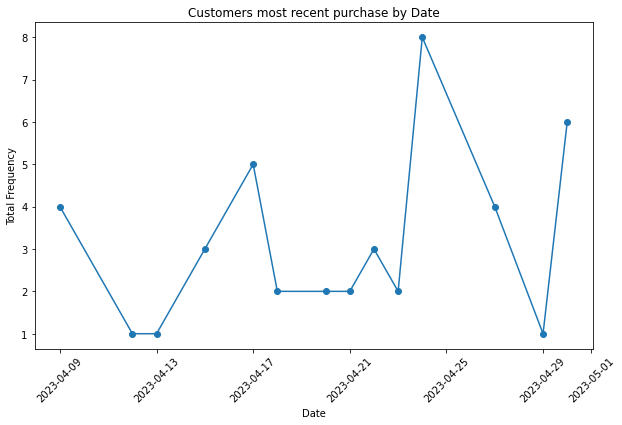

In [153]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [154]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame

df_oldest_date=df_oldest_date.reset_index()
df_oldest_date.drop(columns='index')

,name,email,oldest_Purchase_date
0,michelle baptist,michbaptist@gmail.com,2023-04-05
1,parul kumar,2014parulkumar@gmail.com,2023-04-09
2,anita mishra,anita.x.mishra@gmail.com,2023-04-09
3,neetu vinayak,anish24@gmail.com,2023-04-09
4,gauri,anish24@gmail.com,2023-04-09
5,nisha singh,anish24@gmail.com,2023-04-09
6,rachna chattaram,anish24@gmail.com,2023-04-09
7,anubha,sawhney.anubha@gmail.com,2023-04-09
8,komal verma,anish24@gmail.com,2023-04-09
9,kanchan,samtani.kanchan@bcg.com,2023-04-10


In [156]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount

,name,item payment amount(INR)
0,michelle baptist,9419.0
1,manisha,8675.0
2,amirbanu virji,8403.0
3,kanchan,7304.0
4,parul kumar,6970.0
5,ami gumastha,6890.0
6,ruchi wahi,5602.0
7,anubha,5440.0
8,indrani jafar,5025.0
9,ushma,4745.0


In [157]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
22,michelle baptist,6
29,parul kumar,6
15,kanchan,5
3,anubha,4
36,ruchi wahi,4
2,anita mishra,3
12,indrani jafar,3
16,kerbi patel,2
42,yagnesh thakkar,2
38,sonavi desai,2


In [158]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,michelle baptist,6,9419.0,1569.0
1,manisha,1,8675.0,8675.0
2,amirbanu virji,1,8403.0,8403.0
3,kanchan,5,7304.0,1460.0
4,parul kumar,6,6970.0,1161.0
5,ami gumastha,2,6890.0,3445.0
6,ruchi wahi,4,5602.0,1400.0
7,anubha,4,5440.0,1360.0
8,indrani jafar,3,5025.0,1675.0
9,ushma,1,4745.0,4745.0


In [159]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,ami gumastha,"DRYFRUITS, SEEDS, NUTS",6890.0
1,amirbanu virji,"DRYFRUITS, SEEDS, NUTS",6745.0
2,amirbanu virji,FRUIT BASKET,1658.0
3,anubha,FRUIT BASKET,5440.0
4,indrani jafar,"DRYFRUITS, SEEDS, NUTS",1445.0
5,indrani jafar,FRUIT BASKET,1710.0
6,indrani jafar,"SALADS, EXOTIC VEGETABLES",965.0
7,indrani jafar,VEGETABLES,905.0
8,kanchan,FRUIT BASKET,798.0
9,kanchan,VEGETABLES,6506.0


In [161]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','SUMMER LEAFY COOLING FOODS','VEGETABLES']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['VEGETABLES']+pivot_table['SUMMER LEAFY COOLING FOODS']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",SUMMER LEAFY COOLING FOODS,VEGETABLES,Total Amount(INR)
0,michelle baptist,2175.0,6320.0,0.0,646.0,278.0,9419.0
1,manisha,8675.0,0.0,0.0,0.0,0.0,8675.0
2,amirbanu virji,6745.0,1658.0,0.0,0.0,0.0,8403.0
3,kanchan,0.0,798.0,0.0,0.0,6506.0,7304.0
4,parul kumar,0.0,4089.0,1225.0,0.0,1656.0,6970.0
5,ami gumastha,6890.0,0.0,0.0,0.0,0.0,6890.0
6,ruchi wahi,0.0,2155.0,1995.0,0.0,1452.0,5602.0
7,anubha,0.0,5440.0,0.0,0.0,0.0,5440.0
8,indrani jafar,1445.0,1710.0,965.0,0.0,905.0,5025.0
9,ushma,0.0,4745.0,0.0,0.0,0.0,4745.0


In [162]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['VEGETABLES(percentage) ']=round(pivot_table_p['VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p['SUMMER LEAFY COOLING FOODS(percentage) ']=round(pivot_table_p['SUMMER LEAFY COOLING FOODS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES','SUMMER LEAFY COOLING FOODS','VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)",VEGETABLES(percentage),SUMMER LEAFY COOLING FOODS(percentage)
0,michelle baptist,9419.0,67.10,23.09,0.00,2.95,6.86
1,manisha,8675.0,0.00,100.00,0.00,0.00,0.00
2,amirbanu virji,8403.0,19.73,80.27,0.00,0.00,0.00
3,kanchan,7304.0,10.93,0.00,0.00,89.07,0.00
4,parul kumar,6970.0,58.67,0.00,17.58,23.76,0.00
5,ami gumastha,6890.0,0.00,100.00,0.00,0.00,0.00
6,ruchi wahi,5602.0,38.47,0.00,35.61,25.92,0.00
7,anubha,5440.0,100.00,0.00,0.00,0.00,0.00
8,indrani jafar,5025.0,34.03,28.76,19.20,18.01,0.00
9,ushma,4745.0,100.00,0.00,0.00,0.00,0.00


In [108]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['VEGETABLES']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']+pivot_table_bottom['HERBS & SALADS']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

In [163]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,ami gumastha,"[premium almonds 500g, roasted salted mixed nuts 500g, walnuts 500g, mamra badam 500g]"
1,amirbanu virji,"[premium almonds 500g, walnuts 500g, a2 gir cow ghee 500ml, plain pista 500g, jumbo anjeer 500g, prunes 250g, cashews 500g, elaichi banana 1dozen, raipur guava 1kg, hapus mangoes 1doz, watermelon]"
2,anubha,"[hapus mangoes 1doz, flame red grapes 1 kg, kiwi box, fiji apples 1kg, pomegranate 1kg, watermelon, imported apples 1kg]"
3,indrani jafar,"[gavar 500g, brinjal bharta, dudhi, cucumber white 500g, bitter gourd 500g, french beans 500g, tomatoes 1kg, ladies finger 250g, cauliflower, garlic 200g, carrot ooty 500g, pumpkin 500gm pc, dhani..."
4,kanchan,"[sweet potato 500g, green capsicum 500g, ladies finger 250g, potatoes 1kg, cucumber white 500g, dudhi, cauliflower, french beans 500g, drumsticks 250g, cabbage, tomatoes 1kg, onions 1kg, lemon 200..."
5,manisha,"[golden rasins 500g, roasted salted mixed nuts 500g, premium jumbo dates 500g, premium almonds 500g, jumbo anjeer 500g, walnuts 500g]"
6,michelle baptist,"[pairee mangoes 1 doz, chickoo 1kg, muskmelon 1pc, regular banana 1 doz, blueberries 2 box, flame red grapes 1 kg, hapus mangoes 1doz, ladies finger 250g, bitter gourd 500g, tomatoes 1kg, gavar 50..."
7,parul kumar,"[watermelon, muskmelon 1pc, desi papaya 1pc, elaichi banana 1dozen, delivery, button white mushroom 2packs, kheera cucumber 500g, potatoes 1kg, tomatoes 1kg, drumsticks 250g, ladies finger 250g, o..."
8,ruchi wahi,"[avocados 2 pcs, chickoo 1kg, watermelon, muskmelon 1pc, broccoli 1pc, green zucchini 1pc, yellow zucchini 1pc, red yellow capsicum 1pc, delivery, drumsticks 250g, ladies finger 250g, sweet potato..."
9,ushma,"[blueberries 2 box, hapus mangoes 1doz, raipur guava 1kg, mandarin mini oranges 1kg, flame red grapes 1 kg]"


In [164]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,michelle baptist,"[pairee mangoes 1 doz, chickoo 1kg, muskmelon 1pc, regular banana 1 doz, blueberries 2 box, flame red grapes 1 kg, hapus mangoes 1doz, ladies finger 250g, bitter gourd 500g, tomatoes 1kg, gavar 50...",9419.0
1,manisha,"[golden rasins 500g, roasted salted mixed nuts 500g, premium jumbo dates 500g, premium almonds 500g, jumbo anjeer 500g, walnuts 500g]",8675.0
2,amirbanu virji,"[premium almonds 500g, walnuts 500g, a2 gir cow ghee 500ml, plain pista 500g, jumbo anjeer 500g, prunes 250g, cashews 500g, elaichi banana 1dozen, raipur guava 1kg, hapus mangoes 1doz, watermelon]",8403.0
3,kanchan,"[sweet potato 500g, green capsicum 500g, ladies finger 250g, potatoes 1kg, cucumber white 500g, dudhi, cauliflower, french beans 500g, drumsticks 250g, cabbage, tomatoes 1kg, onions 1kg, lemon 200...",7304.0
4,parul kumar,"[watermelon, muskmelon 1pc, desi papaya 1pc, elaichi banana 1dozen, delivery, button white mushroom 2packs, kheera cucumber 500g, potatoes 1kg, tomatoes 1kg, drumsticks 250g, ladies finger 250g, o...",6970.0
5,ami gumastha,"[premium almonds 500g, roasted salted mixed nuts 500g, walnuts 500g, mamra badam 500g]",6890.0
6,ruchi wahi,"[avocados 2 pcs, chickoo 1kg, watermelon, muskmelon 1pc, broccoli 1pc, green zucchini 1pc, yellow zucchini 1pc, red yellow capsicum 1pc, delivery, drumsticks 250g, ladies finger 250g, sweet potato...",5602.0
7,anubha,"[hapus mangoes 1doz, flame red grapes 1 kg, kiwi box, fiji apples 1kg, pomegranate 1kg, watermelon, imported apples 1kg]",5440.0
8,indrani jafar,"[gavar 500g, brinjal bharta, dudhi, cucumber white 500g, bitter gourd 500g, french beans 500g, tomatoes 1kg, ladies finger 250g, cauliflower, garlic 200g, carrot ooty 500g, pumpkin 500gm pc, dhani...",5025.0
9,ushma,"[blueberries 2 box, hapus mangoes 1doz, raipur guava 1kg, mandarin mini oranges 1kg, flame red grapes 1 kg]",4745.0


In [165]:
detail_item=top_customer_detail[top_customer_detail['name']=='michelle baptist'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,blueberries 2 box,1800.0,3
1,pairee mangoes 1 doz,1265.0,1
2,hapus mangoes 1doz,1250.0,1
3,jumbo anjeer 500g,1125.0,1
4,a2 gir cow ghee 500ml,1050.0,1
5,avocados 2 pcs,685.0,1
6,imported apples 1kg,380.0,1
7,mandarin sweet oranges 1kg,360.0,1
8,flame red grapes 1 kg,325.0,1
9,regular banana 1 doz,300.0,3


In [166]:
detail_item=top_customer_detail[top_customer_detail['name']=='manisha'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2
1,jumbo anjeer 500g,2250.0,2
2,roasted salted mixed nuts 500g,1900.0,2
3,premium almonds 500g,900.0,1
4,premium jumbo dates 500g,815.0,1
5,golden rasins 500g,500.0,1


In [167]:
detail_item=top_customer_detail[top_customer_detail['name']=='amirbanu virji'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,plain pista 500g,1415.0,1
1,hapus mangoes 1doz,1200.0,1
2,walnuts 500g,1155.0,1
3,jumbo anjeer 500g,1125.0,1
4,a2 gir cow ghee 500ml,1050.0,1
5,premium almonds 500g,900.0,1
6,cashews 500g,820.0,1
7,prunes 250g,280.0,1
8,raipur guava 1kg,185.0,1
9,watermelon,155.0,1


In [168]:
detail_item=top_customer_detail[top_customer_detail['name']=='kanchan'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,tomatoes 1kg,724.0,18
1,lemon 200g,594.0,12
2,potatoes 1kg,556.0,16
3,palak bunch,525.0,15
4,onions 1kg,504.0,16
5,ladies finger 250g,428.0,15
6,pear 1kg,300.0,1
7,ginger 250 gm,282.0,8
8,dhaniya bunch,280.0,8
9,french beans 500g,260.0,5


### visualization

In [68]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR)
17,2023-01-24,17299.0
2,2023-01-04,13560.0
16,2023-01-23,12595.0
18,2023-01-26,9024.0
4,2023-01-08,8974.0
12,2023-01-17,8010.0
3,2023-01-05,6420.0
0,2023-01-02,5930.0
1,2023-01-03,5288.0
5,2023-01-09,5090.0


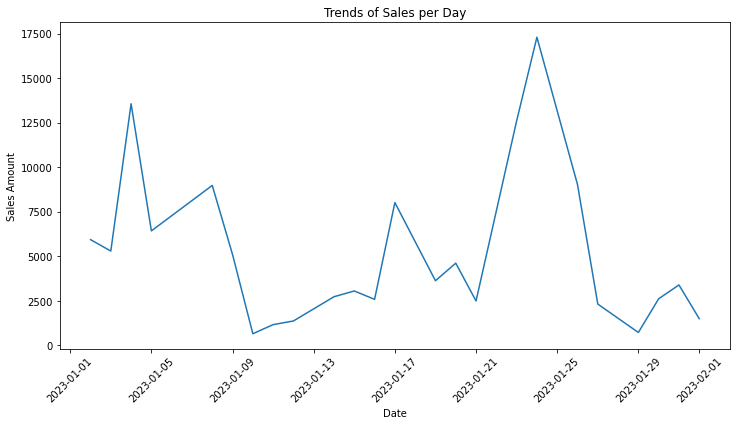

In [69]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
combined_data_payment_completed['date']

0     2023-01-02
1     2023-01-02
2     2023-01-02
3     2023-01-02
4     2023-01-02
         ...    
446   2023-01-30
447   2023-01-30
448   2023-01-30
449   2023-01-30
450   2023-01-30
Name: date, Length: 451, dtype: datetime64[ns]

<Figure size 1440x2160 with 0 Axes>

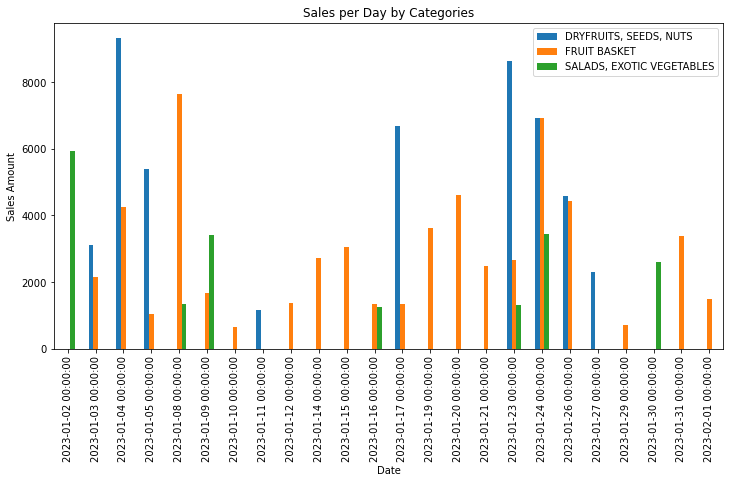

In [71]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

<Figure size 1440x2160 with 0 Axes>

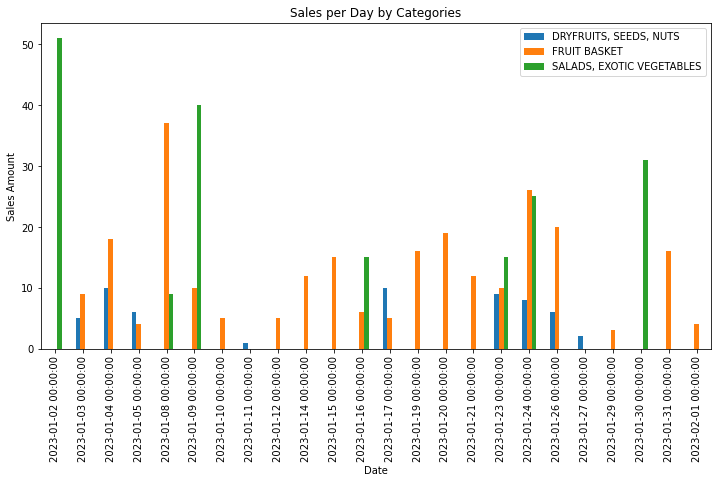

In [72]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [73]:
pd.set_option('display.max_colwidth', 200)

In [74]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [75]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount(INR),item sales quantity,buyers Name
0,a2 gir cow ghee 500ml,1,1050.0,1.0,[namita sahni]
1,brazil nuts 200g,2,1120.0,2.0,"[amirbanu virji, namita sahni]"
2,cashews 500g,5,4100.0,5.0,"[amirbanu virji, indrani jafar, namita sahni, ami gumashta, yogesh thakkar]"
3,dried cranberries 500g,2,1900.0,2.0,"[yogesh thakkar, dinmeher bunshah]"
4,golden rasins 500g,2,1000.0,2.0,"[yogesh thakkar, jasma kapadia]"
5,honey awla 500g,3,1080.0,3.0,"[yogesh thakkar, michelle baptist, ami gumashta]"
6,jumbo anjeer 500g,3,2970.0,3.0,"[yogesh thakkar, jasma kapadia, brinda upadhyaya]"
7,macadamia nuts 200g,1,925.0,1.0,[michelle baptist]
8,makhana 250g,2,975.0,3.0,"[yogesh thakkar, indrani jafar]"
9,mamra badam 500g,4,7120.0,4.0,"[dinmeher bunshah, indrani jafar, namita sahni, ami gumashta]"


Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [76]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
1,2023-01-04,9320.0,"[mamra badam 500g, plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g, dried cranberries 500g]"
5,2023-01-23,8620.0,"[macadamia nuts 200g, premium jumbo dates 500g, walnuts 500g, honey awla 500g, brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g]"
6,2023-01-24,6925.0,"[turkish apricot 200g, walnuts 500g, mixed seeds 250g, honey awla 500g, mamra badam 500g, cashews 500g, jumbo anjeer 500g]"
4,2023-01-17,6680.0,"[premium almonds 500g, prunes 250g, jumbo anjeer 500g, golden rasins 500g, turkish apricot 200g, walnuts 500g]"
2,2023-01-05,5390.0,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
7,2023-01-26,4590.0,"[walnuts 500g, premium jumbo dates 500g, prunes 250g, mixed seeds 250g, cashews 500g]"
0,2023-01-03,3125.0,"[dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g, honey awla 500g, makhana 250g]"
8,2023-01-27,2310.0,[walnuts 500g]
3,2023-01-11,1155.0,[walnuts 500g]


Dryfruits sales this month

### Fruits

In [77]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,6,7200.0,11.0,"[naina, yogesh thakkar, parul kumar, gayathri, jasma kapadia, dinmeher bunshah, nan]"
1,beauty pear 1kg,5,2400.0,8.0,"[parul kumar, indrani jafar, anubha, jasma kapadia, dinmeher bunshah]"
2,blueberries 2 box,11,9000.0,15.0,"[jaishankar vg, jasma kapadia, rachna jain, anubha, toral patel, gayathri, ushma, indrani jafar, simeen oshidar, dinmeher bunshah, asha gopalakrishnan, nan]"
3,delivery,20,555.0,37.0,"[naina, jaishankar vg, yogesh thakkar, jasma kapadia, rachna jain, mridula gupta, anubha, parul kumar, michelle baptist, kanchan samtani, toral patel, sonavi desai, indrani jafar, shwetha kallaje,..."
4,desi papaya 1pc,7,2100.0,21.0,"[naina, mridula gupta, parul kumar, sonavi desai, shwetha kallaje, ushma, dinmeher bunshah]"
5,elaichi banana 1dozen,3,472.0,4.0,"[parul kumar, dinmeher bunshah, naina]"
6,indian apples 1kg,5,1920.0,8.0,"[naina, mridula gupta, gayathri, dinmeher bunshah, yogesh thakkar]"
7,kiwi box,7,2600.0,13.0,"[jasma kapadia, rachna jain, anubha, toral patel, smita vats sharma, gayathri, dinmeher bunshah]"
8,malta oranges 1kg,8,1776.0,12.0,"[yogesh thakkar, anubha, toral patel, gayathri, sonavi desai, naina, dinmeher bunshah, asha gopalakrishnan]"
9,mosumbi local 1kg,5,1485.0,9.0,"[yogesh thakkar, mridula gupta, gayathri, kanchan samtani, dinmeher bunshah]"


In [78]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
3,2023-01-08,7636.0,"[raipur guava 1kg, mosumbi local 1kg, desi papaya 1pc, strawberries 1 box, nagpur oranges 1kg, delivery, indian apples 1kg, pomegranate 1kg, blueberries 2 box, malta oranges 1kg, kiwi box, new zea..."
15,2023-01-24,6931.0,"[new zealand queen apples 1kg, delivery, blueberries 2 box, beauty pear 1kg, avocados 2 pcs, kiwi box, pineapple, red grapes 500g, watermelon, elaichi banana 1dozen, desi papaya 1pc, regular banan..."
12,2023-01-20,4608.0,"[elaichi banana 1dozen, beauty pear 1kg, pomegranate 1kg, sitafal 1kg, new zealand queen apples 1kg, avocados 2 pcs, raipur guava 1kg, delivery, desi papaya 1pc, kiwi box, strawberries 1 box]"
16,2023-01-26,4434.0,"[muskmelon 1pc, desi papaya 1pc, delivery, new zealand queen apples 1kg, strawberries 1 box, malta oranges 1kg, avocados 2 pcs, indian apples 1kg, red grapes 500g, sitafal 1kg, mosumbi local 1kg, ..."
1,2023-01-04,4240.0,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, blueberries 2 box, kiwi box, muskmelon 1pc]"
11,2023-01-19,3621.0,"[mosumbi local 1kg, indian apples 1kg, malta oranges 1kg, strawberries 1 box, delivery, avocados 2 pcs, kiwi box, pomegranate 1kg, sitafal 1kg, blueberries 2 box, desi papaya 1pc, regular banana 1..."
18,2023-01-31,3384.0,"[indian apples 1kg, watermelon, elaichi banana 1dozen, avocados 2 pcs, strawberries 1 box, pomegranate 1kg, malta oranges 1kg, delivery, desi papaya 1pc, red grapes 500g, new zealand queen apples ..."
8,2023-01-15,3045.0,"[sitafal 1kg, strawberries 1 box, delivery, kiwi box, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, watermelon, desi papaya 1pc, regular banana 1 doz, indian apples 1kg]"
7,2023-01-14,2723.0,"[beauty pear 1kg, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, delivery, desi papaya 1pc, avocados 2 pcs, new zealand queen apples 1kg]"
14,2023-01-23,2660.0,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g, pomegranate 1kg]"


### Vegetables

In [79]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,buyers count,sales amount,item sales quantity,item name,buyers Name


In [80]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,item payment amount(INR),date,item name


### Exotic vegetables

In [81]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,4,2550.0,4.0,"[kanchan samtani, indrani jafar, toral patel, dinmeher bunshah]"
1,baby spinach,4,660.0,6.0,"[indrani jafar, shradha goenka, parvin dumasia, dinmeher bunshah]"
2,babybella mushroom 2packs,3,525.0,3.0,"[toral patel, dinmeher bunshah, kerbi patel]"
3,babycorn 1pack,4,390.0,6.0,"[trupti, michelle baptist, dinmeher bunshah, ashish billimoria]"
4,broccoli 1pc,7,680.0,8.0,"[kerbi patel, jasma kapadia, indrani jafar, naina, shradha goenka, madhu, dinmeher bunshah]"
5,button white mushroom 2packs,4,700.0,5.0,"[jasma kapadia, michelle baptist, dinmeher bunshah, naina]"
6,celery 250g,4,280.0,4.0,"[trupti, naina, dinmeher bunshah, kerbi patel]"
7,cherry tomatoes 250g,7,850.0,10.0,"[kanchan samtani, indrani jafar, naina, shradha goenka, toral patel, parvin dumasia, dinmeher bunshah]"
8,delivery,16,495.0,33.0,"[kerbi patel, trupti, kanchan samtani, meenal, ashish billimoria, jasma kapadia, dinmeher bunshah, michelle baptist, indrani jafar, abha mehta, naina, shradha goenka, madhu, toral patel, parvin du..."
9,green zucchini 1pc,2,170.0,2.0,"[dinmeher bunshah, ashish billimoria]"


In [82]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
0,2023-01-02,5930.0,"[broccoli 1pc, delivery, purple cabbage 1 pc, s romaine, red yellow capsicum 1pc, s swiss chard, s curl kale, s spicy mix, imported blueberries 2punnets, iceberg lettuce 1 pc, celery 250g, babycor..."
5,2023-01-24,3443.0,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,2023-01-09,3405.0,"[s summercrisp, s butterhead, button white mushroom 2packs, italian basil, delivery, s spicy mix, s lettuce mix, cherry tomatoes 250g, red yellow capsicum 1pc, broccoli 1pc, celery 250g, baby spin..."
6,2023-01-30,2608.0,"[babycorn 1pack, s butterhead, s summercrisp, delivery, japanese cucumber 500g, celery 250g, s curl kale, s swiss chard, red yellow capsicum 1pc, babybella mushroom 2packs, s aragula, iceberg lett..."
1,2023-01-08,1338.0,"[cherry tomatoes 250g, red yellow capsicum 1pc, avocados 2 pcs, iceberg lettuce 1 pc, purple cabbage 1 pc, babybella mushroom 2packs, delivery, italian basil]"
4,2023-01-23,1315.0,"[delivery, s lettuce mix, s aragula, cherry tomatoes 250g, baby spinach, s romaine]"
3,2023-01-16,1245.0,"[baby spinach, cherry tomatoes 250g, s aragula, s spicy mix, delivery, s romaine, s lettuce mix, s summercrisp, s butterhead]"


In [83]:
combined_data_payment_completed['name'].unique()

array(['kerbi patel', 'trupti', 'kanchan samtani', 'meenal',
       'ashish billimoria', 'jasma kapadia', 'dinmeher bunshah',
       'michelle baptist', 'indrani jafar', 'naina', 'jaishankar vg',
       'yogesh thakkar', 'rachna jain', 'amirbanu virji', 'mridula gupta',
       'anubha', 'parul kumar', 'toral patel', 'sonavi desai',
       'shwetha kallaje', 'abha mehta', 'shradha goenka', 'madhu',
       'namita sahni', 'ami gumashta', 'brinda upadhyaya',
       'smita vats sharma', 'gayathri', 'ushma', 'parvin dumasia',
       'meher mirza', 'simeen oshidar', 'asha gopalakrishnan', nan],
      dtype=object)

#### Indrani's data 

In [84]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

,item name,item quantity,item payment amount(INR)
10,mamra badam 500g,1.0,1780.0
20,salted pista 500g,1.0,1450.0
5,cashews 500g,1.0,820.0
0,avocados 2 pcs,1.0,700.0
12,pine nuts 100g,1.0,690.0
9,makhana 250g,2.0,650.0
21,strawberries 1 box,3.0,615.0
3,blueberries 2 box,1.0,600.0
8,japanese cucumber 500g,4.0,320.0
2,beauty pear 1kg,1.0,300.0


In [85]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

,date,item name
0,2023-01-02,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g]"
1,2023-01-05,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
2,2023-01-09,"[beauty pear 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, raipur guava 1kg, broccoli 1pc, baby spinach, s romaine, s aragula, purple cabbage 1 pc, s butterhead, red yellow capsicum 1pc, ..."
3,2023-01-23,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g]"


In [86]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,email,date,time,year,day,month,name
60,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,strawberries 1 box,215.0,2.0,430.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
61,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,delivery,15.0,1.0,15.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
62,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,sitafal 1kg,260.0,1.0,260.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
63,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,mosumbi local 1kg,165.0,1.0,165.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
64,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,avocados 2 pcs,650.0,1.0,650.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
65,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,pomegranate 1kg,350.0,1.0,350.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
66,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,nagpur oranges 1kg,145.0,1.0,145.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
67,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,malta oranges 1kg,148.0,1.0,148.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
85,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,dried cranberries 500g,950.0,1.0,950.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar
86,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,golden rasins 500g,500.0,1.0,500.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar


# END